In [48]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [49]:
def rename_cols_and_save(xls_name):
    df = pd.read_excel("../../data/{0}.xls".format(xls_name), index_col=None, header=None)
    if xls_name == 'hprice1':
        names_dict = {0:'price', 
                     1:'assess', 
                     2:'bdrms',
                     3:'lotsize', 
                     4:'sqrft', 
                     5:'colonial',
                     6:'lprice', 
                     7:'lassess', 
                     8:'llotsize',
                     9:'lsqrft', 
                    }
    df.rename(columns = names_dict, inplace = True)
    df.to_csv("../../data/{0}.csv".format(xls_name), index=False)
    return df

df = rename_cols_and_save(xls_name='hprice1')

In [50]:
df.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630


## Plotting the Housing Data

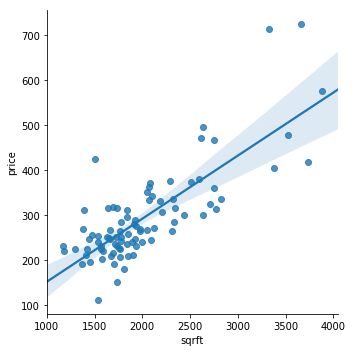

In [51]:
sns_plot = sns.lmplot(x="sqrft", y="price", data=df)
sns_plot.savefig("images/correlation_price_sqrft.png")

## Estimating a Simple Regression Model

In [52]:
X = df["sqrft"]
X = sm.add_constant(X)
y = df["price"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
df['predictions_linear'] = predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     140.8
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           8.42e-20
Time:                        21:05:49   Log-Likelihood:                -489.31
No. Observations:                  88   AIC:                             982.6
Df Residuals:                      86   BIC:                             987.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2041     24.743      0.453      0.652     -37.983      60.391
sqrft          0.1402      0.012     11.866      0.000       0.117       0.164
==============================================================================
Omnibus:                       26.343   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.311
Skew:                           1.185   Prob(JB):                     8.79e-11
Kurtosis:                       5.649   Cond. No.                     7.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Non-Linear Relationships

### Quadratic Relationship 

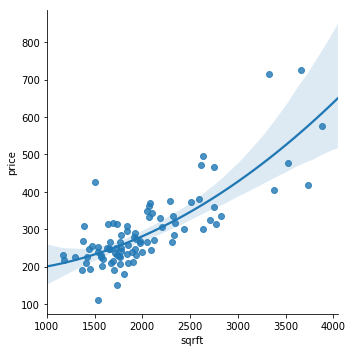

In [53]:


sns_plot = sns.lmplot(x="sqrft", y="price", data=df, order=2)
sns_plot.savefig("images/correlation_price_sqrft_squared.png")



In [54]:

df["squared_sqrft"] = df["sqrft"]**2
X = df["squared_sqrft"]
X = sm.add_constant(X)
y = df["price"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
df['predictions_nonlinear_sqr'] = predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     153.3
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           8.27e-21
Time:                        21:05:50   Log-Likelihood:                -486.95
No. Observations:                  88   AIC:                             977.9
Df Residuals:                      86   BIC:                             982.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           165.6620     12.259     13.514      0.000     141.292     190.032
squared_sqrft  2.917e-05   2.36e-06     12.381      0.000    2.45e-05    3.39e-05
==============================================================================
Omnibus:                       20.527   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.224
Skew:                           0.954   Prob(JB):                     6.10e-08
Kurtosis:                       5.328   Cond. No.                     9.66e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Log Linear Model

In [55]:
def dist_plot(df, var, color):
    sns_plot = sns.distplot(df[var], color=color).get_figure()
    sns_plot.savefig("images/dist_plot_{0}.png".format(var))
    return None

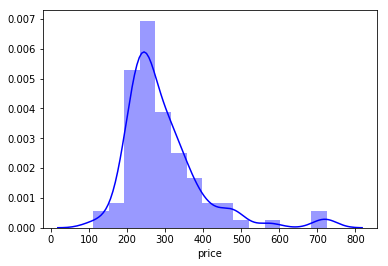

In [56]:
dist_plot(df=df, var='price', color='b')

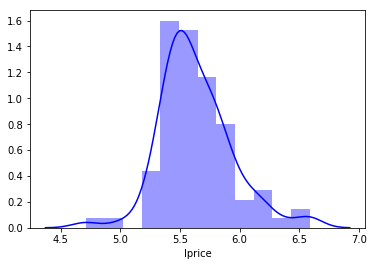

In [57]:
dist_plot(df=df, var='lprice', color='b')

In [58]:

X = df["sqrft"]
X = sm.add_constant(X)
y = df["lprice"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
df['predictions_log_linear'] = predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           4.80e-18
Time:                        21:05:50   Log-Likelihood:                 19.103
No. Observations:                  88   AIC:                            -34.21
Df Residuals:                      86   BIC:                            -29.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8240      0.077     62.959      0.000       4.672       4.976
sqrft          0.0004   3.66e-05     10.981      0.000       0.000       0.000
==============================================================================
Omnibus:                        8.695   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               17.216
Skew:                          -0.202   Prob(JB):                     0.000183
Kurtosis:                       5.129   Cond. No.                     7.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression with Indicator Variables

In [59]:
def box_plot(df, var_x, var_y):
    sns_plot = sns.boxplot(x=var_x, y=var_y, data=df).get_figure()
    sns_plot.savefig("images/box_plot_{0}_{1}.png".format(var_x,var_y))
    return None



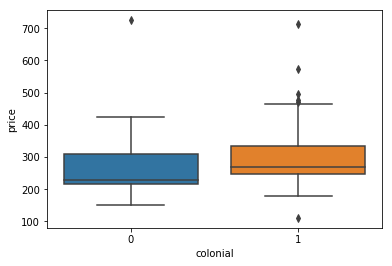

In [60]:
box_plot(df=df, var_x='colonial', var_y='price')

In [65]:
df.groupby('colonial')['price'].describe().T

colonial,0,1
count,27.000000,61.000000
mean,272.370370,302.918869
std,111.692365,97.982466
min,150.000000,111.000000
25%,217.000000,246.000000
50%,230.000000,270.000000
75%,309.500000,335.000000
max,725.000000,713.500000


In [62]:
X = df["colonial"]
X = sm.add_constant(X)
y = df["price"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.668
Date:                Sun, 22 Mar 2020   Prob (F-statistic):              0.200
Time:                        21:06:42   Log-Likelihood:                -531.13
No. Observations:                  88   AIC:                             1066.
Df Residuals:                      86   BIC:                             1071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        272.3704     19.692     13.832      0.000     233.225     311.516
colonial      30.5485     23.652      1.292      0.200     -16.469      77.566
==============================================================================
Omnibus:                       55.174   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.470
Skew:                           2.108   Prob(JB):                     2.94e-44
Kurtosis:                       9.075   Cond. No.                         3.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""